## HOMEWORK 1

### Zeri di funzione

Utilizzare il metodo di bisezione, il metodo delle iterazioni di punto fisso e il metodo di Newton per il calcolo dello zero della
una funzione $ f(x) = e^x − x^2 $, la cui soluzione è $ x^∗ = −0.7034674 $. Per il metodo delle iterazioni di punto fisso considerare come funzione $ g(x) $:
* $ g(x) = x − f(x)e^{x/2} $
* $ g(x) = x − f(x)e^{−x/2} $

Per analizzare i risultati utilizzare strumenti grafici e tabelle. In particolare:
1. Disegnare il grafico della funzione $ f(x) $ nell’intervallo $ I = [-1,1] $ e verificare che $ x^∗ $ sia lo zero di $ f(x) $ in $ [-1, 1] $.
2. Confrontare l’accuratezza delle soluzioni trovate e il numero di iterazioni effettuate dai solutori.
3. Graficare per ogni metodo l’errore assoluto $ |x_k−x^∗| $ ad ogni iterazione $ k $.

#### SOLUZIONE:

Iniziamo col definire le funzioni principali e i vari metodi per calcolare i zeri di funzione. I metodi sono:
1. Metodo della bisezione
2. Metodo delle iterazioni di punto fisso
3. Metodo di newton

Ci serviranno le seguenti librerie:

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

Definisco le costanti e le funzioni:
* $ f(x) = e^x − x^2 $
* $ g(x) = x − f(x)e^{x/2} $
* $ g(x) = x − f(x)e^{−x/2} $
* $ df(x) = e^x - 2 * x $

In [46]:
MAXIT = 100
TOL = 1e-6

def f(x):
    return np.exp(x) - x**2

def g1(x):
    return x - f(x) * np.exp(x / 2)

def g2(x):
    return x - f(x) * np.exp(-x / 2)

def df(x):
    return np.exp(x) - 2 * x

#### 1. Metodo della bisezione

In [47]:
def bisection_method(f, a, b, tol=TOL, maxit=MAXIT):
    """
    Metodo della bisezione per trovare uno zero della funzione f nell'intervallo [a, b].
    
    Parameters:
    f (callable): La funzione per cui trovare lo zero.
    a (float): Estremo sinistro dell'intervallo.
    b (float): Estremo destro dell'intervallo.
    tol (float): Tolleranza per la convergenza.
    max_iter (int): Numero massimo di iterazioni.
    
    Returns:
    tuple: Il valore dello zero trovato e una lista degli zeri calcolati in ogni iterazione.
    """
    if f(a) * f(b) > 0:
        raise ValueError("La funzione deve avere segni opposti agli estremi dell'intervallo [a, b].")
    
    iterations: list = []
    Emax = (b - a) / 2.0

    for _ in range(maxit):
        c = (a + b) / 2.0
        iterations.append(c)
        
        if np.abs(f(c)) < tol or Emax < tol:
            break
        elif f(c) * f(a) < 0:
            b = c
        else:
            a = c

        Emax = (b - a) / 2.0

    return c, iterations

#### 2. Metodo delle iterazioni di punto fisso

In [48]:
def fixed_point_iteration_method(g, x0, tol=TOL, maxit=MAXIT):
    """
    Metodo di iterazione punto fisso per trovare uno zero della funzione g.
    
    Parameters:
    g (callable): La funzione di iterazione punto fisso.
    x0 (float): Punto iniziale per l'iterazione.
    tol (float): Tolleranza per la convergenza.
    max_iter (int): Numero massimo di iterazioni.
    
    Returns:
    tuple: Il valore dello zero trovato e una lista dei valori calcolati in ogni iterazione.
    """
    iterations: list = [x0]
    
    for _ in range(maxit):
        x1 = g(x0)
        iterations.append(x1)
        Emax = np.abs(x1 - x0)
        
        if Emax < tol:
            break
        
        x0 = x1
        
    return x1, iterations

#### 3. Metodo di Newton

In [49]:
def newton_method(f, df, x0, tol=TOL, maxit=MAXIT):
    """
    Metodo di Newton per trovare uno zero della funzione f.
    
    Parameters:
    f (callable): La funzione per cui trovare lo zero.
    df (callable): La derivata della funzione f.
    x0 (float): Punto iniziale per l'iterazione.
    tol (float): Tolleranza per la convergenza.
    max_iter (int): Numero massimo di iterazioni.
    
    Returns:
    tuple: Il valore dello zero trovato e una lista dei valori calcolati in ogni iterazione.
    """
    iterations: list = [x0]

    for _ in range(maxit):
        x1 = x0 - f(x0) / df(x0)
        iterations.append(x1)
        Emax = np.abs(x1 - x0)

        if Emax < tol:
            break
        
        x0 = x1
        
    return x1, iterations

#### 1. Disegnare il grafico della funzione $ f(x) $ nell’intervallo $ I = [-1,1] $ e verificare che $ x^∗ $ sia lo zero di $ f(x) $ in $ [-1, 1] $.

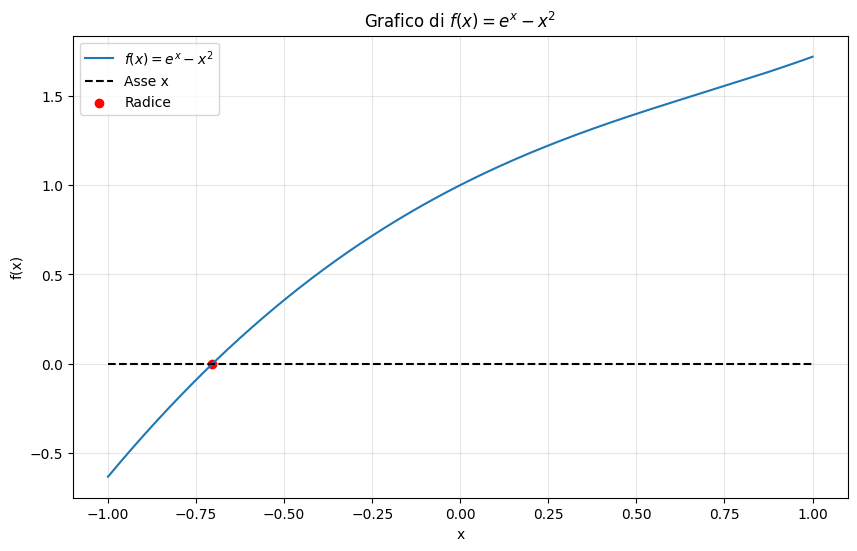

In [50]:
a: int = -1
b: int = 1
x: list = np.linspace(a, b, 1000)
x_star: float = -0.7034674

plt.figure(figsize=(10, 6))
plt.plot(x, f(x), label='$f(x) = e^x - x^2$')
plt.plot([a, b], [0, 0], 'k--', label='Asse x')
plt.scatter(x_star, f(x_star), color='red', label='Radice')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Grafico di $f(x) = e^x - x^2$')
plt.grid(alpha=0.3)
plt.legend()
plt.show()

Nel grafico possiamo distiguere i seguenti elementi:
* La linea curva rappresenta $ f(x) $.
* La linea tratteggiata rappresenta l'asse orrizzontale $ x $.
* Il punto rosso indica la posizione dello zero $ x^* $.

Possiamo vedere chiaramente che la funzione cambia di segno intorno al punto rosso, questo conferma che $ x^* $ è uno zero.

#### 2. Confrontare l’accuratezza delle soluzioni trovate e il numero di iterazioni effettuate dai solutori.

Calcoliamo le soluzioni e confrontiamo i risultati.

In [51]:
a: int = -1
b: int = 1
x: list = np.linspace(a, b, 1000)

x_bis, iter_bis = bisection_method(f, a, b)
x_fp1, iter_fp1 = fixed_point_iteration_method(g1, 0)
x_fp2, iter_fp2 = fixed_point_iteration_method(g2, 0)
x_newton, iter_newton = newton_method(f, df, 0)

comparison: list = []

comparison.append({
    'Metodo': 'Bisezione',
    'Soluzione': x_bis,
    'Iterazioni': len(iter_bis)
})

comparison.append({
    'Metodo': 'Punto Fisso (g1)',
    'Soluzione': x_fp1,
    'Iterazioni': len(iter_fp1)
})

comparison.append({
    'Metodo': 'Punto Fisso (g2)',
    'Soluzione': x_fp2,
    'Iterazioni': len(iter_fp2)
})

comparison.append({
    'Metodo': 'Newton',
    'Soluzione': x_newton,
    'Iterazioni': len(iter_newton)
})

comparison_table = pd.DataFrame(comparison)
pd.set_option('display.float_format', '{:.7f}'.format)

comparison_table

,Metodo,Soluzione,Iterazioni
0,Bisezione,-0.7034674,21
1,Punto Fisso (g1),-0.7034672,15
2,Punto Fisso (g2),-0.4877586,101
3,Newton,-0.7034674,6


Dai risultati possiamo osservare che tra i tre metodi il metodo delle iterazioni di punto fisso è quello che ha prodotto risultati meno soddisfacenti rispetto agli altri. Questo perchè il metodo dipende fortemente dalla scelta di $g(x)$.

Le soluzioni del metodo di bisezione e del metodo di Newton sono entrambe corrette ma notiamo che Newton ha il numero di iterazioni minore data la sua convergenza quadratica.
Per quanto riguarda il punto fisso invece, possiamo concludere che $g2$ non è stata una buona scelta.

#### 3. Graficare per ogni metodo l’errore assoluto $ |x_k−x^∗| $ ad ogni iterazione $ k $.

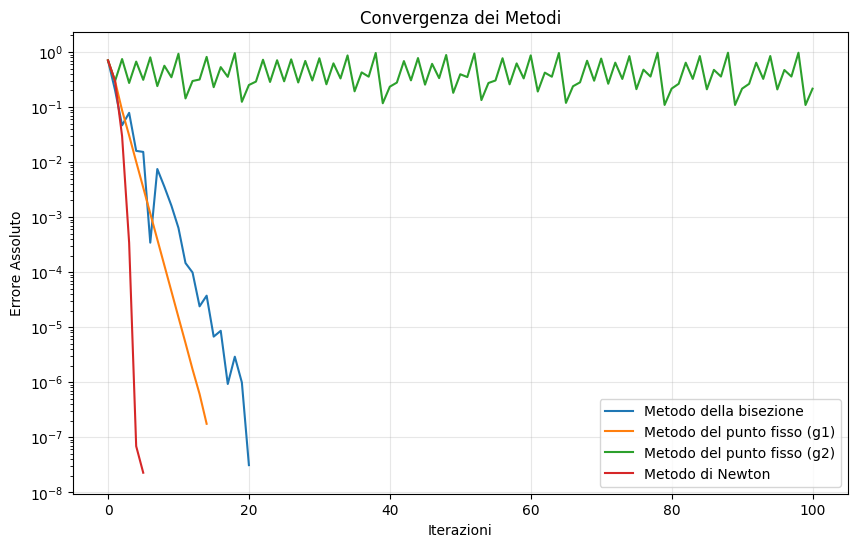

In [52]:
plt.figure(figsize=(10, 6))
plt.plot(np.abs(np.array(iter_bis) - x_star), '-', label='Metodo della bisezione')
plt.plot(np.abs(np.array(iter_fp1) - x_star), '-', label='Metodo del punto fisso (g1)')
plt.plot(np.abs(np.array(iter_fp2) - x_star), '-', label='Metodo del punto fisso (g2)')
plt.plot(np.abs(np.array(iter_newton) - x_star), '-', label='Metodo di Newton')
plt.yscale('log')
plt.xlabel('Iterazioni')
plt.ylabel('Errore Assoluto')
plt.title('Convergenza dei Metodi')
plt.grid(alpha=0.3)
plt.legend()
plt.show()

Dal grafico possiamo notare la rapidità della convergenza del metodo di Newton e la convergenza lenta ma stabile del metodo della bisezione.
Mentre per il metodo delle iterazioni di punto fisso abbiamo che $ g1 $ ha una convergenza buona ma altalenante e che $ g2 $ probabilmente non converge allo zero corretto.

Quindi ricapitolando:
* Bisezione: il risultato è garantito ma è più lento rispetto ad altri metodi esistenti.
* Iterazioni di punto fisso: dipende molto dalla scelta di $ g(x) $.
* Newton: efficiente se la guess iniziale è buona e abbiamo disponibile la derivata.


### Risoluzione di sistemi lineari

Creato un problema test di dimensione variabile $ n $ la cui soluzione esatta sia un vettore $ x $ generato a piacere e $ y $ il termine noto ottenuto moltiplicando la matrice $ A $ per la soluzione $ x $:
1. Calcolare il numero di condizione tramite opportuna funzione Python
2. Risolvere il sistema lineare $ Ax = b $ con la fattorizzazione LU o Cholesky.
3. Calcolare l’errore relativo rispetto alla soluzione esatta. Variare la dimensione $ n $ del sistema e fare un grafico dell’errore al variare di $ n $ e uno del numero di condizione al variare di $ n $.

Problemi test da utilizzare:
* Una matrice di numeri casuali $ A $ generata con la funzione np.random.randn.
* Una matrice di Hilbert di dimensione $ n $ (con $ n $ variabile fra 2 e 15) utilizzando la funzione scipy.linalg.hilb.

#### SOLUZIONE:

Per la risoluzione del secondo esercizio dobbiamo importare una libreria aggiuntiva rispetto a quelle già importate in precedenza.

In [31]:
import scipy.linalg as la

Definiamo la funzione generate_matrix, che genera un problema test in base alla tipologia richiesta (random, hilbert), e la funzione solve_system che risolve il sistema, come richiesto dal punto 2.

La funzione solve_system prova prima ad applicare Cholesky e in caso di fallimento applica LU. Ho scelto questo approccio in quanto se la matrice è simmetrica e definita positiva Cholesky è la scelta più ottimale e così facendo la funzione non richiede di conoscere a priori le proprietà della matrice.

In [32]:
def generate_matrix(n, type='random'):
    """
    Genera un problema di sistema lineare Ax = b.
    
    Parameters:
    n (int): Dimensione della matrice A.
    type (str): Tipo di matrice ('random' o 'hilbert').
    
    Returns:
    tuple: La matrice A, il vettore b e la soluzione x.
    """
    x = np.random.randn(n)
    
    if type == 'random':
        A = np.random.rand(n, n)
    elif type == 'hilbert':
        A = la.hilbert(n)
    else:
        raise ValueError("Tipo di matrice non supportato. Usa 'random' o 'hilbert'.")
    
    b = A @ x
    
    return A, b, x

def solve_system(A, b):
    """
    Risolve il sistema lineare Ax = b utilizzando Cholesky o LU decomposition.

    Parameters:
    A (np.ndarray): Matrice del sistema lineare.
    b (np.ndarray): Vettore dei termini noti.

    Returns:
    np.ndarray: Soluzione del sistema lineare.
    """
    try:
        L = la.cholesky(A, lower=True)
        y = la.solve_triangular(L, b, lower=True)
        x = la.solve_triangular(L.T, y)
    except la.LinAlgError:
        P, L, U = la.lu(A)
        y = la.solve_triangular(L, P.T @ b, lower=True)
        x = la.solve_triangular(U, y)
        
    return x

Nel seguente blocco di codice viene svolto il punto 1, 2 e parte del 3 utilizzando una matrice di numeri casuali e una matrice di Hilbert al variare di $ n $.

In [33]:
n: range = range(2, 16)
cond_random: list = []
cond_hilbert: list = []
errors_random: list = []
errors_hilbert: list = []

for i in n:
    A_random, b_random, x_exact_random = generate_matrix(i)
    A_hilbert, b_hilbert, x_exact_hilbert = generate_matrix(i, type='hilbert')
    
    # 1. Calcolare il numero di condizione tramite opportuna funzione Python 
    cond_random.append(np.linalg.cond(A_random))
    cond_hilbert.append(np.linalg.cond(A_hilbert))
    
    # 2. Risolvere il sistema lineare Ax = b con la fattorizzazione LU o Cholesky.
    x_random = solve_system(A_random, b_random)
    x_hilbert = solve_system(A_hilbert, b_hilbert)
    
    # 3. Calcolare l’errore relativo rispetto alla soluzione esatta.
    errors_random.append(np.linalg.norm(x_exact_random - x_random) / np.linalg.norm(x_exact_random))
    errors_hilbert.append(np.linalg.norm(x_exact_hilbert - x_hilbert) / np.linalg.norm(x_exact_hilbert))

E infine creiamo un grafico che mostra l'errore al variare di $ n $ e uno che mostra il numero di condizione sempre al variare di $ n $.

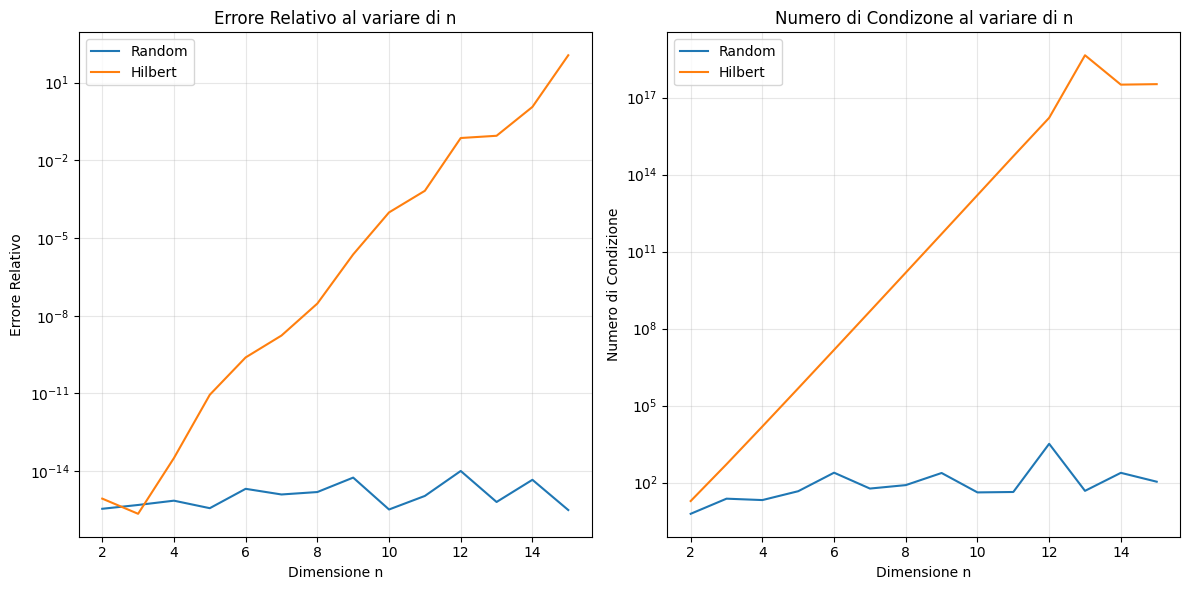

In [34]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(n, errors_random, label='Random')
plt.plot(n, errors_hilbert, label='Hilbert')
plt.yscale('log') 
plt.xlabel('Dimensione n')
plt.ylabel('Errore Relativo')
plt.title('Errore Relativo al variare di n')
plt.legend()
plt.grid(alpha=0.3)

plt.subplot(1, 2, 2)
plt.plot(n, cond_random, label='Random')
plt.plot(n, cond_hilbert, label='Hilbert')
plt.yscale('log')
plt.xlabel('Dimensione n')
plt.ylabel('Numero di Condizione')
plt.title('Numero di Condizone al variare di n')
plt.legend()
plt.grid(alpha=0.3)

plt.tight_layout()
plt.show()

Partendo dal grafico riguardante l'errore relativo, ossserviamo che gli errori delle matrici random si mantengono basse per tutte le dimensioni, quindi la crescita della grandezza della matrice non compromette significativamente la precisione. Contrariamente per le matrici Hilbert, l'errore cresce in modo notevole all'aumentare di $ n $.

Comportamento simile lo notiamo nel secondo grafico dove il numero di condizione si mantiene abbastanza stabile per le matrici random, mentre per le matrici Hilbert c'è una crescita significativa.

Il comportamento simile è dato dal fatto che il numero di condizione misura quanto gli errori nei dati vengono amplificati nella soluzione. L'errore relativo quindi tende a essere proporzionale al numero di condizione del sistema, maggiore è $ k(A) $ più il problema è sensibile a errori si arrotondamento e instabilità numerica. Questa è una delle ragioni per cui in calcolo numerico si preferisce lavorare con matrici ben condizionate o adottare tecniche stabilizzanti.

### Minimi quadrati

Assegnata una matrice $ A $ di numeri casuali (funzione np.random.normal) di dimensione $ m \times n, m > n $ fissati, scegliere un vettore $ \alpha $ (per esempio con elementi costanti) come soluzione esatta per creare un problema test e calcolare il termine noto $ y = A \alpha + e $, dove $ e $ è un vettore di numeri casuali generato con la funzione precedente (utilizzare una varianza in $ [0.01, 0.1] $). Quindi risolvere il problema di minimi quadrati:

$$
\min_{\alpha} \| A\alpha - y \|_2^2
$$

sia utilizzando le equazioni normali che la SVD di A. Inotre:
* Confrontare le due soluzioni.
* Calcolare la norma due del vettore dei residui in entrambi i casi.

#### SOLUZIONE:

Creiamo inanzitutto il problema test con la varianza a 0.05.

In [52]:
m: int = 100
n: int = 20
variance: float = 0.1
A = np.random.normal(size=(m, n))

alpha_exact = np.ones(n)

e = np.random.normal(0, np.sqrt(variance), size=m)
y = A @ alpha_exact + e

Definiamo una funzione per risolvere i minimi quadrati in base al metodo passato come argomento.

In [53]:
def solve_least_squares(A, y, type='normal'):
    """
    Risolve il problema dei minimi quadrati Ax = y utilizzando il metodo specificato.
    
    Parameters:
    A (np.ndarray): Matrice del sistema.
    y (np.ndarray): Vettore dei termini noti.
    type (str): Tipo di metodo da utilizzare ('normal' o 'svd').
    
    Returns:
    tuple: Soluzione dei minimi quadrati, il residuo e la norma del residuo.
    """
    if type not in ["normal", "svd"]:
        raise ValueError("Tipo di metodo non supportato. Usa 'normal' o 'svd'.")
    
    if type == "normal":
        ATA = A.T @ A
        alpha = np.linalg.solve(ATA, A.T @ y) 
    elif type == "svd":
        U, s, Vh = la.svd(A, full_matrices=False)
        alpha = Vh.T @ np.diag(1 / s) @ U.T @ y

    residual_norm = np.linalg.norm(y - A @ alpha, 2)

    return alpha, residual_norm

Procediamo con la risoluzione del problema utilizzando la funzione appena definita e visualizziamo i risultati.

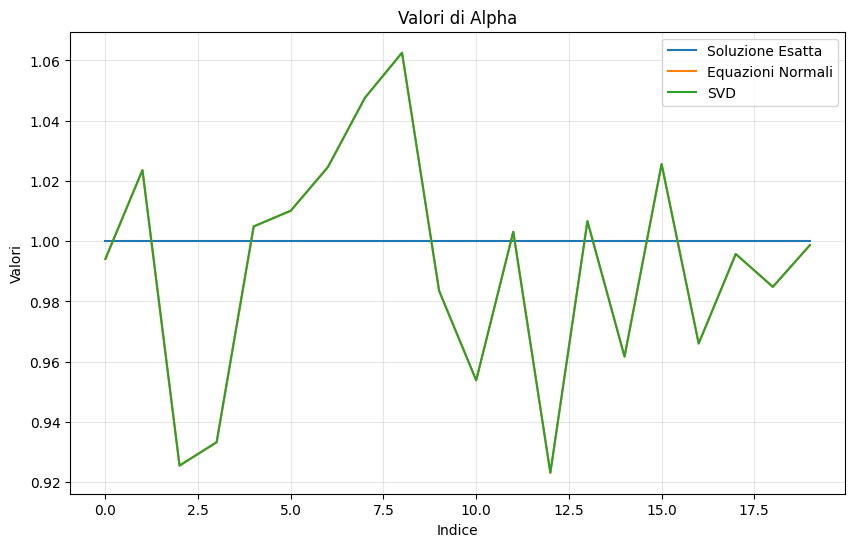

,Metodo,||r||_2,Soluzione
0,Equazioni Normali,2.908,"[0.9941184590468186, 1.0236117035897425, 0.9255202532396201, 0.9332758150492351, 1.0049097942075167, 1.0101245498880704, 1.0245985193619316, 1.0476181244801632, 1.062573357672272, 0.983537967008696, 0.9538292339651079, 1.0031508505854096, 0.9231523620356241, 1.0066732757281034, 0.9616963502425426, 1.0256104709891298, 0.9660475832232386, 0.9957519695279741, 0.9848530178178009, 0.9987086045534194]"
1,SVD,2.908,"[0.9941184590468182, 1.023611703589743, 0.925520253239622, 0.9332758150492324, 1.0049097942075156, 1.0101245498880698, 1.024598519361932, 1.0476181244801643, 1.0625733576722727, 0.9835379670086986, 0.9538292339651071, 1.0031508505854094, 0.9231523620356211, 1.0066732757281027, 0.9616963502425409, 1.0256104709891316, 0.9660475832232407, 0.9957519695279757, 0.9848530178178009, 0.9987086045534221]"


In [54]:
alpha_normal, norm_normal = solve_least_squares(A, y, type='normal')
alpha_svd, norm_svd = solve_least_squares(A, y, type='svd')

plt.figure(figsize=(10, 6))
plt.plot(range(n), alpha_exact, label='Soluzione Esatta')
plt.plot(range(n), alpha_normal, label='Equazioni Normali')
plt.plot(range(n), alpha_svd, label='SVD') 
plt.xlabel('Indice')
plt.ylabel('Valori')
plt.title('Valori di Alpha')
plt.grid(alpha=0.3)
plt.legend()
plt.show()

comparison = []

comparison.append({
    'Metodo': 'Equazioni Normali',
    '||r||_2': norm_normal,
    'Soluzione': alpha_normal
})

comparison.append({
    'Metodo': 'SVD',
    '||r||_2': norm_svd,
    'Soluzione': alpha_svd
})

comparison_table = pd.DataFrame(comparison)
pd.set_option('display.max_colwidth', None)
comparison_table

Non è difficile notare che le due soluzioni (equazioni normali e svd) producono circa lo stesso risultato con differenze a partire dalla 14esimo decimale dopo la virgola, il che conferma che $ A $ è ben condizionata e l'algoritmo e stabile. Quindi anche l'approccio delle equazioni normali che in generale può amplificare gli errori numerici, fornisce risultati stabili.

Le soluzioni ottenute sono molto vicine a quella esatta con piccole deviazioni dovute al rumore $ e $. I valori sono coerenti con il rumore a varianza 0.05.

Facciamo un piccolo esperimento con una matrice mal condizionata.


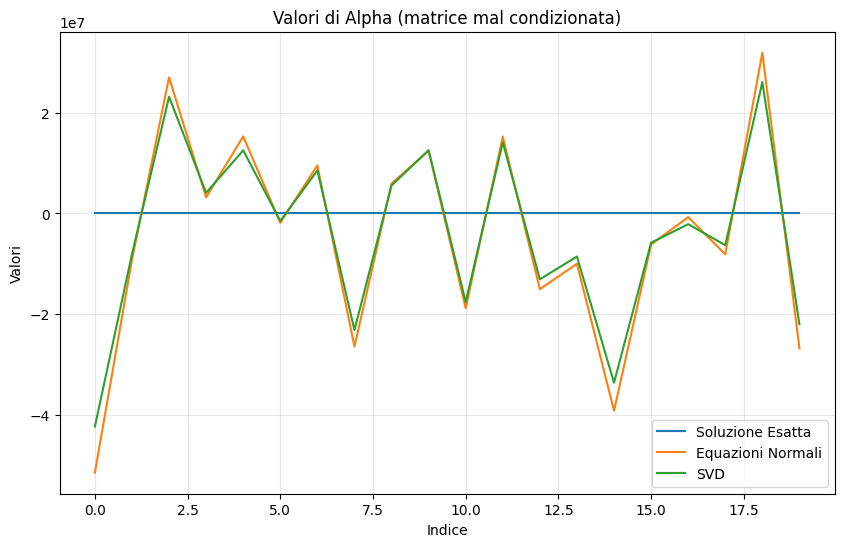

,Metodo,||r||_2,Soluzione
0,Equazioni Normali,2.712,"[-51448628.45831041, -9201973.744737132, 27000451.112087876, 3193841.942839292, 15278308.840503827, -1865696.4807703241, 9534092.103070052, -26407908.401042428, 5926155.049758583, 12462263.130124776, -18807529.05721993, 15243110.637677234, -15023024.865688765, -9990240.774207756, -39144161.930897444, -6159953.1965388665, -726315.7109912316, -8110850.391938739, 31893637.128648724, -26758752.154961612]"
1,SVD,2.707,"[-42299909.23911934, -8087897.288612563, 23155810.88408627, 4092876.84237573, 12517184.272864494, -1496685.4154163804, 8527630.85084403, -23126763.410037197, 5549618.426202057, 12537115.335902084, -17583216.455736578, 14120515.033062212, -13073525.735679902, -8543061.70196358, -33586773.072829194, -5798707.021750955, -2126923.746837992, -6295967.60398042, 26067540.387079068, -21972227.33687889]"


In [56]:
U, _, Vt = la.svd(np.random.normal(size=(m, n)), full_matrices=False)
sigmas = np.logspace(0, -8, n)
A_bad = U @ np.diag(sigmas) @ Vt
y_bad = A_bad @ alpha_exact + e

alpha_bad_normal, norm_bad_normal = solve_least_squares(A_bad, y_bad, type='normal')
alpha_bad_svd, norm_bad_svd = solve_least_squares(A_bad, y_bad, type='svd')

plt.figure(figsize=(10, 6))
plt.plot(range(n), alpha_exact, label='Soluzione Esatta')
plt.plot(range(n), alpha_bad_normal, label='Equazioni Normali')
plt.plot(range(n), alpha_bad_svd, label='SVD') 
plt.xlabel('Indice')
plt.ylabel('Valori')
plt.title('Valori di Alpha (matrice mal condizionata)')
plt.grid(alpha=0.3)
plt.legend()
plt.show()

comparison = []

comparison.append({
    'Metodo': 'Equazioni Normali',
    '||r||_2': norm_bad_normal,
    'Soluzione': alpha_bad_normal
})

comparison.append({
    'Metodo': 'SVD',
    '||r||_2': norm_bad_svd,
    'Soluzione': alpha_bad_svd
})

comparison_table = pd.DataFrame(comparison)
pd.set_option('display.max_colwidth', None)
comparison_table

La differenza diventa più evidente con matrici molto mal condizionate, dove SVD mantiene una maggiore stabilità numerica rispetto alle equazioni normali.